In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def load_images(image_files):
    with open(image_files, 'rb') as f:
        magic = int.from_bytes(f.read(4), byteorder='big')
        if magic != 2051:
            raise ValueError("Invalid magic number, expected 2051")
        
        num_images = int.from_bytes(f.read(4), byteorder='big')

        rows = int.from_bytes(f.read(4), byteorder='big')
        cols = int.from_bytes(f.read(4), byteorder='big')

        images = np.frombuffer(f.read(), dtype= np.uint8)

        images = images.reshape(num_images, rows, cols)

        return images



In [10]:
def load_labels(label_files):
    with open(label_files, 'rb') as f:
        magic = int.from_bytes(f.read(4), byteorder='big')
        if magic != 2049:
            raise ValueError("Invalid Magic Number, expected 2051")
        
        num_labels = int.from_bytes(f.read(4), byteorder='big')

        labels = np.frombuffer(f.read(), dtype= np.uint8)

        return labels

In [6]:
train_image = load_images('train-images.idx3-ubyte')

In [7]:
train_image.shape

(60000, 28, 28)

In [11]:
train_label = load_labels('train-labels.idx1-ubyte')

In [12]:
train_label.shape

(60000,)

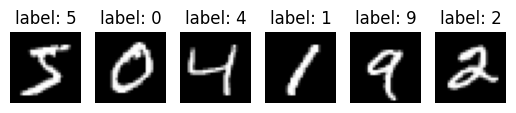

In [19]:
display = 6

for i in range(display):
    plt.subplot(1, display, i + 1)
    plt.imshow(train_image[i], cmap = 'gray')
    plt.title(f"label: {train_label[i]}")
    plt.axis('off')

plt.show()